# Psychological and Cognitive Networks Project
## Lyrics-Based Semantic Networks

### Authors:
* Omer Madmon
* Ariel Kreisberg Nitzav

## Background

In this project, we examine the differences and similarities between three popular music genres: Pop, Hip-Hop and Rock. The three differ in multiple aspects, among them their lyrical content: based on the work of Sarjoun Doumit et al., we seek to examine lyrics of songs which belong to the three genres mentioned using Network Analysis, and draw conclusions regarding their typical structure, their lyrical richness and the ideas expressed in them.

## Data

The data was acquired from "Songs Lyrics From 6 Musical Genres" dataset, which is available in [Kaggle](https://www.kaggle.com/neisse/scrapped-lyrics-from-6-genres).

## Pre-Processing

We first perform some pre-processing operations and create an artists-lyrics unified dataframe for each genre.
Preprocessing can be view in data_preprocessing.py

In [1]:
import pandas as pd

df_dict = dict()
for genre in ['Rock', 'Pop', 'Hip Hop']:
    genre_url = genre.replace(' ', '%20')
    url = f'https://github.com/omermadmon/Text2Net/blob/master/examples/lyrics_based_semantic_networks/data/{genre_url}_data.csv?raw=true'
    df_dict[genre] = pd.read_csv(url, index_col=0)

In [2]:
df_dict['Rock']

,Artist,Popularity,Genre,SName,Lyric
0,maroon 5,90.3,Rock,Girls Like You (Feat. Cardi B),"Spent 24 hours, I need more hours with you. Yo..."
1,maroon 5,90.3,Rock,She Will Be Loved,Beauty queen of only eighteen. She had some tr...
2,maroon 5,90.3,Rock,Sugar,"I'm hurting baby, I'm broken down. I need your..."
3,maroon 5,90.3,Rock,Girls Like You,"Spent 24 hours, I need more hours with you. Yo..."
4,maroon 5,90.3,Rock,This Love,I was so high I did not recognize. The fire bu...
...,...,...,...,...,...
8601,pitty,8.1,Rock,Ignorin'u,I am ignoring you. I will ignore you. I am ign...
8602,pitty,8.1,Rock,Inside The Beer Bottle (com Cascadura),I'm at a bar without a name. Lookin' through a...
8603,pitty,8.1,Rock,Just Now,"My child, so much to learn. Feel my breast fee..."
8604,pitty,8.1,Rock,Stay Away,"Monkey see, monkey do (I don't know why). I'd ..."


In [3]:
df_dict['Pop']

,Artist,Popularity,Genre,SName,Lyric
0,ariana grande,246.8,Pop,7 Rings,"Yeah, breakfast at Tiffany's. And bottles of b..."
1,ariana grande,246.8,Pop,"Break Up With Your Girlfriend, I'm Bored",You got me some type of way (Hmm). Ain't used ...
2,ariana grande,246.8,Pop,"Thank U, Next",Thought I'd end up with Sean. But he wasn't a ...
3,ariana grande,246.8,Pop,Needy,If you take too long to hit me back. I can't p...
4,ariana grande,246.8,Pop,7 Rings (Feat. 2 Chainz) (Remix),"Yeah, breakfast at Tiffany's. And bottles of b..."
...,...,...,...,...,...
8597,carly rae jepsen,10.0,Pop,When I Needed You,What if we could go back?. We could take the w...
8598,carly rae jepsen,10.0,Pop,Worldly Matters,"Hot pink skies, twilight of the day. I think t..."
8599,carly rae jepsen,10.0,Pop,Wrong Feels So Right,You got your way with me now didn't cha. And I...
8600,carly rae jepsen,10.0,Pop,Your Heart is a Muscle,You gave my shirt back. I don't really get the...


In [4]:
df_dict['Hip Hop']

,Artist,Popularity,Genre,SName,Lyric
0,eminem,79.9,Hip Hop,Rap God,"Look, I was gonna go easy on you. And not to h..."
1,eminem,79.9,Hip Hop,Lose Yourself,"Look, if you had one shot. Or one opportunity...."
2,eminem,79.9,Hip Hop,Venom,I got a song filled with shit for the strong w...
3,eminem,79.9,Hip Hop,Without Me,"[Obie Trice]. ""Obie Trice, Real Name No Gimmic..."
4,eminem,79.9,Hip Hop,Mockingbird,"Yeah. I know sometimes,. things may not always..."
...,...,...,...,...,...
8393,flo rida,2.4,Hip Hop,Wild Ones (feat. Sia),"(Sia). Hey, I heard you were a wild one. If I ..."
8394,flo rida,2.4,Hip Hop,Wooble,Every time you come around. I'm like ooh ooh b...
8395,flo rida,2.4,Hip Hop,"Yayo (Feat. Brisco, Billy Blue, Ball Greezy, R...","Yayo. Yaayo!. Ya-Yo. (Flo-Rida). Hey, I coulda..."
8396,flo rida,2.4,Hip Hop,Zillionaire,I gotta ask where you been hiding. You're like...


## Network Estimation

For each genre, we will sample 50 songs and construct a network from this sample:

In [5]:
from Text2Net import Text2Net
from Utils import visualize
import random

graph = {}
sample_size = 50
for genre in ['Rock', 'Hip Hop', 'Pop']:
  lyrics = '\n'.join([df_dict[genre]['Lyric'][i] for i in random.sample(range(0, len(df_dict[genre]['Lyric'])), sample_size)])
  graph[genre] = Text2Net(lyrics).transform(n_nodes=100, weight_function='jaccard')

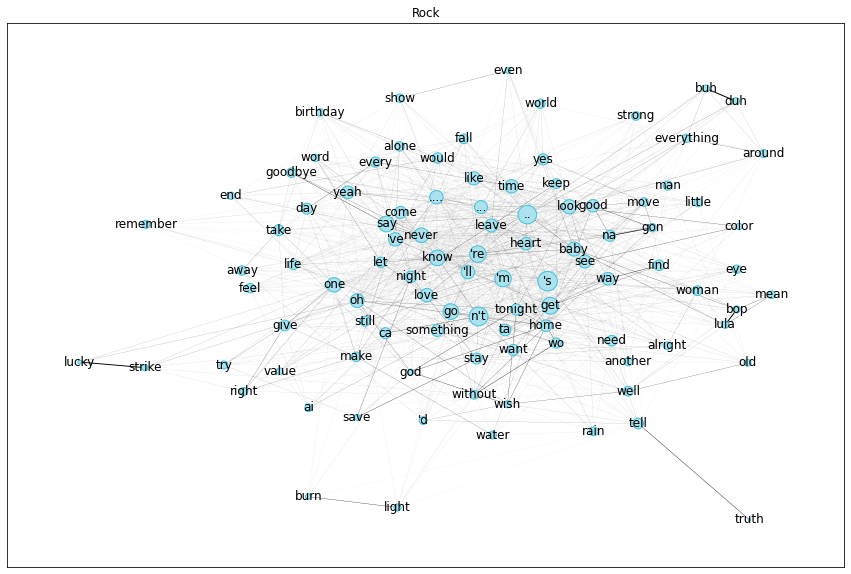

In [6]:
visualize(graph['Rock'], 'Rock', nodes_factor=5, edges_factor=1)

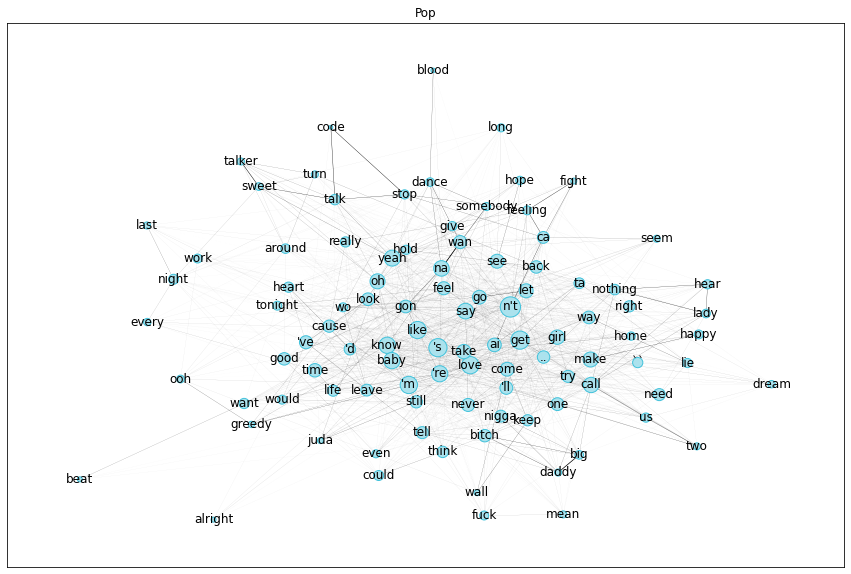

In [7]:
visualize(graph['Pop'], 'Pop', nodes_factor=5, edges_factor=1)

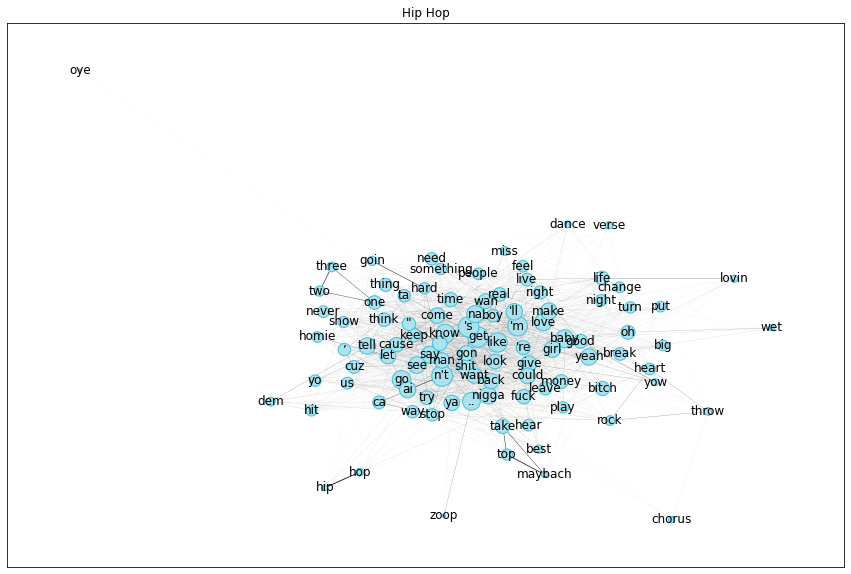

In [8]:
visualize(graph['Hip Hop'], 'Hip Hop', nodes_factor=5, edges_factor=1)

The Hip Hop networks is the most connected network, as expected.

## Bootstrap

We will create 50 a bootstrap sample, each sample of size 200.
The bootstrap sampling implementation is available at bootstrap_sampling.py

In [9]:
import pickle

with open('data/measures_dict.pickle', 'rb') as handle:
    measures_dict = pickle.load(handle)

## Measures Descriptive Statistics & Statistical Testing 

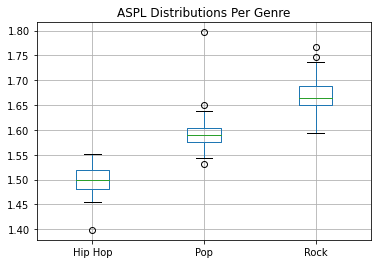

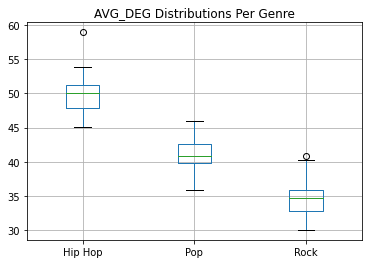

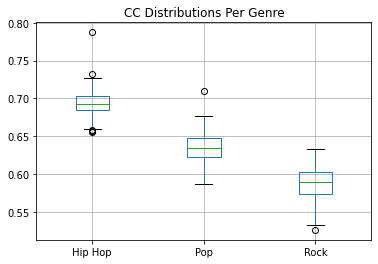

In [10]:
import matplotlib.pyplot as plt

genres = ['Rock', 'Hip Hop', 'Pop']
measures = ['ASPL', 'AVG_DEG', 'CC']

for measure in measures:
    df = pd.DataFrame()
    for genre, d in measures_dict.items():
        df[genre] = pd.Series(d[measure])
    boxplot = df.boxplot()
    boxplot.set_title(f'{measure} Distributions Per Genre')
    plt.show()

In [11]:
from itertools import combinations, product
from scipy.stats import ttest_ind
from collections import defaultdict

g_couples = list(combinations(genres, r=2))
hypothesis = list(product(g_couples, measures))
pv_dict = {}
for genres, measure in hypothesis:
    T, pv = ttest_ind(measures_dict[genres[0]][measure], measures_dict[genres[1]][measure], equal_var=False)
    pv_dict[(genres, measure)] = {'T': T, 'P-value': pv, 'Bonf. Adj. P-value': len(hypothesis)*pv,
                                  'Rejected': len(hypothesis)*pv < 0.05}

pvalues_dataframe_rows = {k: defaultdict(int) for k in g_couples}
for key, value in pv_dict.items():
    ((genre1, genre2), measure) = (key[0][0], key[0][1]), key[1]
    pv = value['Bonf. Adj. P-value']
    pvalues_dataframe_rows[(genre1, genre2)][measure] = pv

results = pd.DataFrame(pvalues_dataframe_rows.values(),
                       index=[f'{genres[0]} - {genres[1]}' for genres in pvalues_dataframe_rows.keys()])

results

,ASPL,AVG_DEG,CC
Rock - Hip Hop,1.341103e-42,6.082992e-50,1.934417e-40
Rock - Pop,4.602273e-15,8.164462e-25,1.088889e-16
Hip Hop - Pop,3.432754e-23,2.945553e-31,3.186846e-22


As the p-values indicate, all hypotheses are rejected for every reasonable simultaneous confidence level.

## Topics Representation In Genres

Topic-genre score is calculated according to the formula:

$score(G, Topic):= \Sigma_{word\in Topic \cap G.nodes} {PageRank_{G}(word)}$

Where $G$ is the genre's network and $Topic$ is the list of words representing the topic.

In [12]:
import networkx as nx

topics = {
    'romantic': ['honey', 'goodbye', 'woman', 'love', 'heart', 'care', 'feel', 'friend', 'girl', 'feeling', 'baby', 
                 'relationship', 'soul', 'boy', 'heartbreak', 'break'],
    'profanity': ['sex', 'sexy', 'bitch', 'pussy', 'ass', 'nigga', 'shit', 'dirty', 'hoe', 'hell', 'fuck', 'suck', 'damn'],
    'selfishness': ['i', 'im', 'me', 'mine', 'myself', 'self', 'am', 'ill', 'imma'],
    'partying': ['hands', 'hair', 'jump', 'feet', 'club', 'night', 'party', 'dance', 'dancing', 'boom', 'tonight', 'summer', 'play']
}

topic_scores = { topic : defaultdict(list) for topic in topics.keys() }

sample_size = 200
num_samples = 20

for genre in ['Rock', 'Hip Hop', 'Pop']:
    i = 0
    while i < num_samples:
        lyrics = '\n'.join([df_dict[genre]['Lyric'][i] for i in random.sample(range(0, len(df_dict[genre]['Lyric'])), sample_size)])
        G = Text2Net(lyrics).transform(n_nodes=100, weight_function='jaccard')
        pr = nx.pagerank(G, alpha = 0.9)
        for topic, topic_words in topics.items():
          topic_score = sum([pr[word] for word in set(topic_words).intersection(set(pr.keys()))])
          topic_scores[topic][genre].append(topic_score)
        i+=1

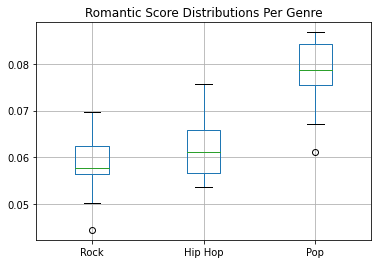

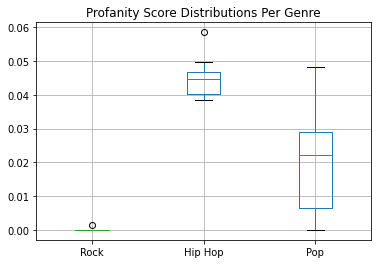

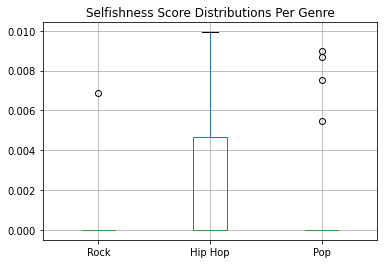

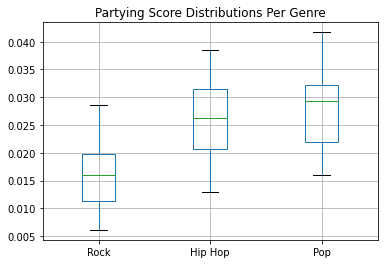

In [13]:
for topic in topic_scores.keys():
  boxplot = pd.DataFrame(topic_scores[topic]).boxplot()
  boxplot.set_title(f'{topic.capitalize()} Score Distributions Per Genre')
  plt.show()